## Final Project


### Data: Ford GoBike System Data

### Overview of the Data: 

<font size=3 >This data set includes information about individual rides made in a bike-sharing system covering the greater Sant Francisco Bay Area. The data inlcudes information about user trip location, gender and etc.<font/>.

### Short detail about visualisations and investigation of the data

<font size=3 >In this data visualization I mostly focused on user's status on gender and subscription, trip duration time and number of trips per.
by gender and subscription type <font/>.

In [1]:
# Import libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from matplotlib import rcParams

### Data gathering

In [3]:
# open the dataset
bike = pd.read_csv('fordgobike.csv')
rcParams['figure.figsize'] = 11,8


### Data wrangling

In [4]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [5]:
# summary of the data
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [6]:
# shape of the data
bike.shape

(519700, 15)

In [7]:
bike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender'],
      dtype='object')

In [8]:
# check how the dataset variables are distributed and overall summary
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


In [11]:
# unique variables for each column
bike.nunique()

duration_sec                13490
start_time                 519688
end_time                   519681
start_station_id              272
start_station_name            272
start_station_latitude        272
start_station_longitude       272
end_station_id                272
end_station_name              272
end_station_latitude          272
end_station_longitude         272
bike_id                      3673
user_type                       2
member_birth_year              73
member_gender                   3
dtype: int64

In [9]:
# gender types
bike.member_gender.value_counts()

Male      348318
Female     98621
Other       6299
Name: member_gender, dtype: int64

####  Data issues: 
From the data as you can see starting time and eding time for bikes column data type need to be changed
- 'start_time and end_time' columns needs to be converted to datetime 
- member birthday is in float need to convert int 

#### Fixing issues

In [12]:
# convert to datetime
bike.start_time = pd.to_datetime(bike.start_time)
bike.end_time = pd.to_datetime(bike.end_time)


In [14]:
# change data format birth year data format to int
bike.member_birth_year = bike.member_birth_year.astype('Int64')

### Data  Exploration with visualization

#### *Since the project is needed to be done mostly by making visualizations. We are not doing any othe exploration analysis.


### Exploration flow are divided to three steps including 2 or 3 plot for each step:
- 1. Univariate plots.
- 2. Bivariate plots.
- 3. Multivariate plots.

### 1. Univariate plots

### What user type is traveled more?

<font size = '4'> <b> From the plot output below I can easily say that subscribers of  a bike riding company did more trips, compared to ordinary customers of a company. To be more specific, subscribers traveled almost
double times more than customers </b>
</font> 

Text(0.5, 1.0, 'Subscirber vs Customer')

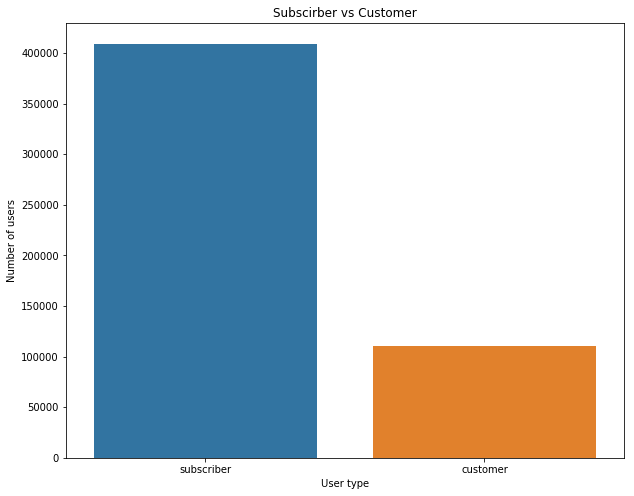

In [32]:
# the difference between subscribers and customer
user_count = np.array(bike.user_type.value_counts())
user_type = ['subscriber', "customer"]

ax = sb.barplot(x = user_type, y = user_count)

plt.xlabel('User type')
plt.ylabel('Number of trips')
plt.title('Subscirber vs Customer')



### 1.2 Trips by user birth year

## Observation

<font size='4'>
<b> People who was born between 1980 to 1995 have significantly more trips compared to other travelers.
and the trips was between 15000 to 25000, while other people was mostly below than 10000. This also tells that
people more gets older the more the trips will be decreased. Also, the figure below show that 1985 born travelers have maximum number of trips with almost 25000 trips</b>
</font>

(array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64,
        68, 72]), <a list of 19 Text xticklabel objects>)

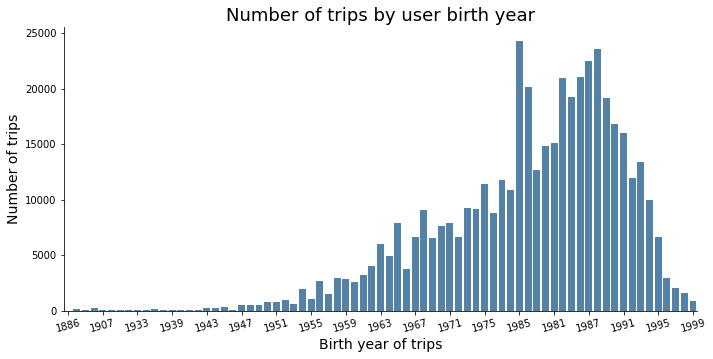

In [23]:
g = sb.catplot("member_birth_year", data=bike, aspect=2,
                kind="count", color='steelblue', height = 5)
g.set_xticklabels(step=4);
plt.xlabel('Birth year of trips', fontsize=14)
plt.ylabel('Number of trips', fontsize=14)
plt.title('Number of trips by user birth year', fontsize=18)
plt.tight_layout()
plt.xticks(rotation=15)

<font> People who was born between 1980 to 1995 have significantly more trips compared to other travelers.
and the trips was between 15000 to 25000, while other people was mostly below than 10000. This also tells that
people more gets older the more the trips will be decreased</font>

In [34]:
bike.member_gender.value_counts()

Male      348318
Female     98621
Other       6299
Name: member_gender, dtype: int64

### 1.3 Which gender type likes traveling with bike?

## Observation

<font size='4'>
<b>It is interesting to see that male gender type has more traveling.
    From our exploration, males travels more
    with almost 350000 trips, while female has only 100000 trips. </b>
</font>    

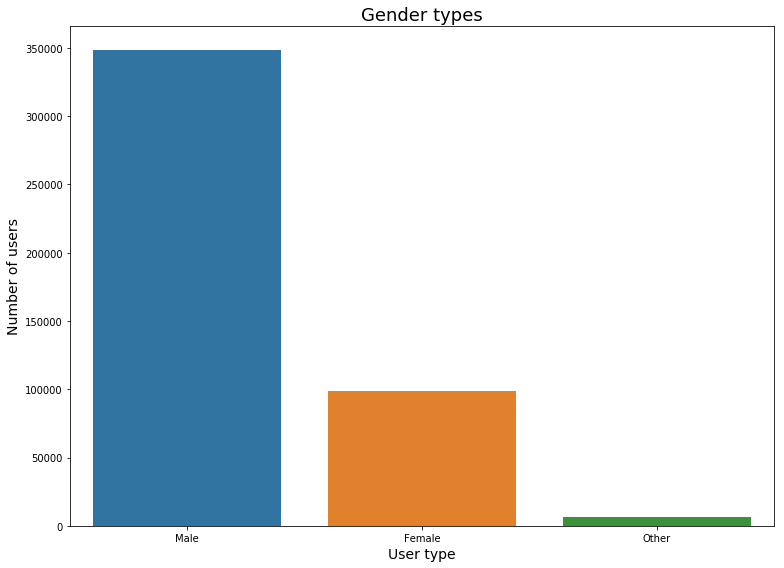

In [37]:
# plot for user gender types
user_count = np.array(bike.member_gender.value_counts())
user_type = ['Male', 'Female', 'Other']

ax = sb.barplot(x = user_type, y = user_count)

plt.xlabel('User type', fontsize=14)
plt.ylabel('Number of trips', fontsize=14)
plt.title('Gender types', fontsize=18)
plt.tight_layout()

### 2. Bivariate plot

#### 2.1 Trip duration time density plot for the gender of members

## Observation


<font size='4'>
<b>From the figure below female has more trip duraion variation compared to man.However average trip duration time
is almost reaming similar by ranging 0 to 3000 seconds</b>
</font>  

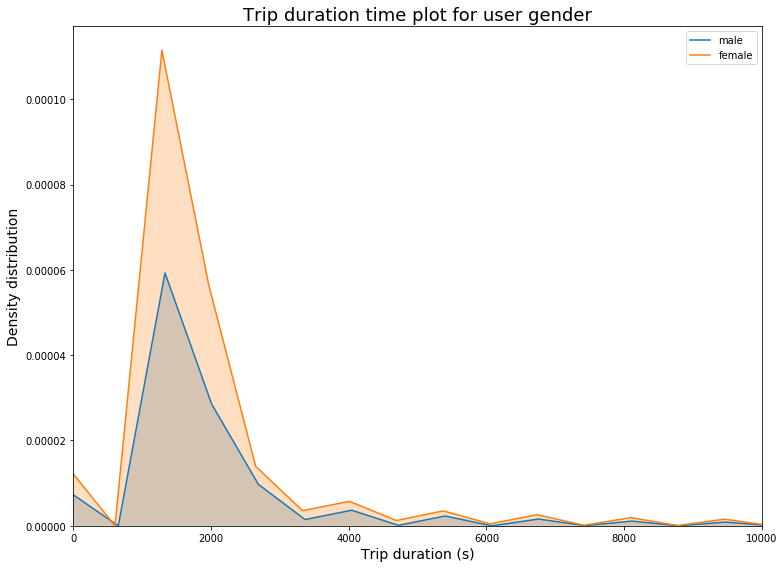

In [26]:
sb.kdeplot(bike.duration_sec[bike.member_gender == 'Male'], label = 'male', shade = True)
sb.kdeplot(bike.duration_sec[bike.member_gender == 'Female'], label = 'female', shade = True)
#sb.kdeplot(bike.duration_sec[bike.member_gender == 'Other'], label = 'other', shade = True)
#plt.gca().invert_xaxis()
plt.xlim(0, 10000)
plt.xlabel('Trip duration (s)', fontsize=14)
plt.ylabel('Density distribution', fontsize=14)
plt.title('Trip duration time plot for user gender', fontsize=18)
plt.tight_layout()

#### 2.2 The user type distribution based on their gender 

## Observation

<font size= '4'> 
    <b>It is obvious to say that men has more trips for both custmores and subscribers for bike traveling. The subscribes experienced to have
more trips compared to subscribers. To be more specifice men for subscribers has over than 300.000 trips while male customers
have less than 5000 trips. Similarly, women for subsciribers have significantl higher amount of trips in compared to customer women.
Overall, subscribers tend to have more trips than customers with noticeable difference.</b>
    </font>

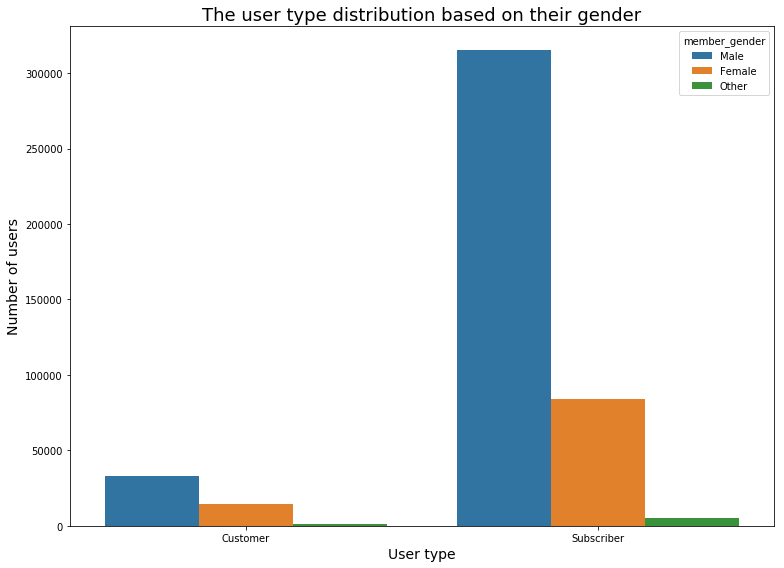

In [57]:
# plotting the user type with gender type of the members
sb.countplot(data = bike, x = 'user_type', hue = 'member_gender')
plt.xlabel('User type', fontsize=14)
plt.ylabel('Number of trips', fontsize=14)
plt.title('The user type distribution based on their gender', fontsize=18)
plt.tight_layout()

#### 2.3 Trip duration time based on their gender

### Observation

<font size= '4'> 
    <b>It looks like there is not significant difference on trip duration for male and female.
    However, Men are shows more close distribution of trip duration while female have slightly higher distribution. </b>
    </font>

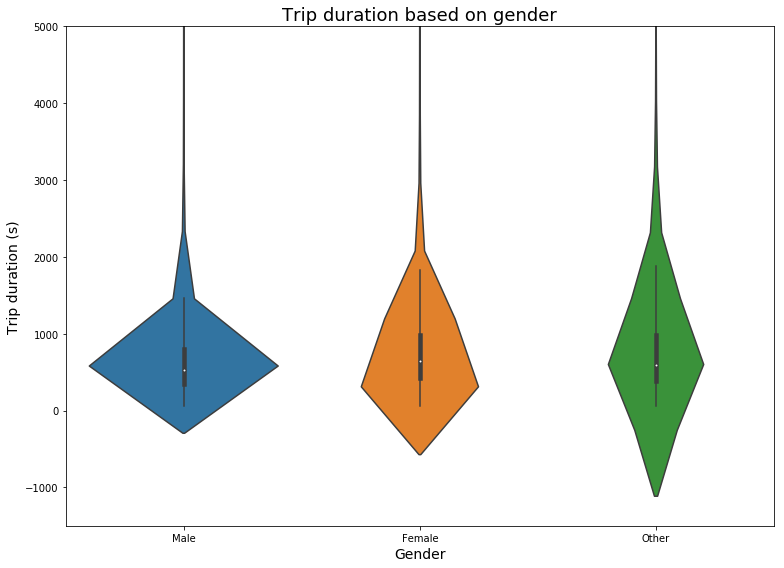

In [58]:
sb.violinplot("member_gender", "duration_sec", data = bike)
plt.ylim(-1500, 5000)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Trip duration (s)', fontsize=14)
plt.title('Trip duration based on gender', fontsize=18)
plt.tight_layout()

In [ ]:
#sb.jointplot("duration_sec", "member_birth_year", data=bike, kind='reg')

In [42]:
bike.member_gender.unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

### 3. Multivariate plots

#### 3.1 Multivariate plot of user's birth year, trip duration tim and gender

### Observation

<font size= '4'> 
    <b>Users by their birth year have linear relationship with gender. Most trips are done by young users and most of them have
    trip duration less than 20000 seconds.</b>
    </font>

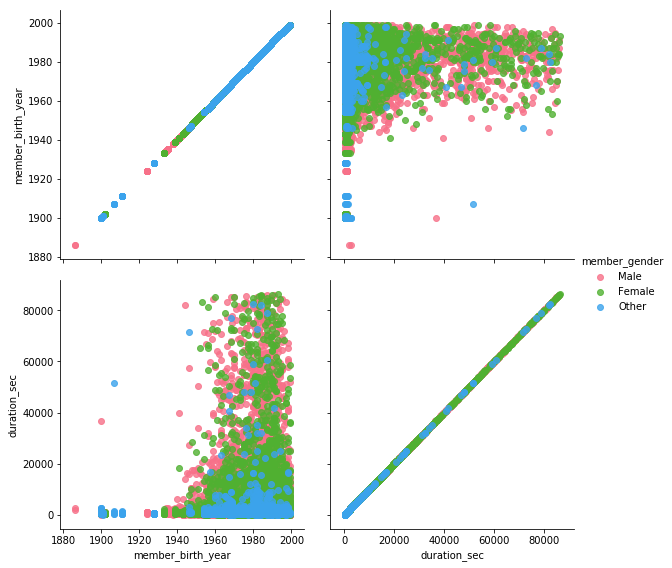

<Figure size 1080x1080 with 0 Axes>

In [53]:
g = sb.PairGrid(bike, vars=['member_birth_year', 'duration_sec'], hue = 'member_gender', palette = 'husl', height=4)
g.map(plt.scatter, alpha = 0.8)
g.add_legend()
plt.figure(figsize = (15, 15))
plt.tight_layout();

#### 3.2 Multivariate violin plot for the disritbution of user gender and trip duration based on user type

<font size= '4'> 
    <b>Trip duration for customers have more wide time distribution compared to subscribers. Subscirbers for men and women genders
    show almost same time duration. Overall, All the bike riders shows less than 2000 second trip </b>
    </font>

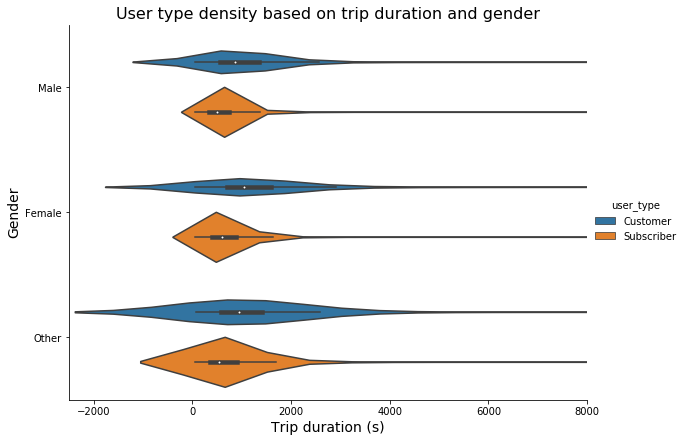

In [81]:
sb.catplot(x="duration_sec", y="member_gender", hue="user_type", kind="violin", data=bike, height=6, aspect = 1.4);
plt.xlim(-2500, 8000)
plt.xlabel('Trip duration (s)', fontsize=14)
plt.ylabel('Gender', fontsize=14)
plt.title('User type trip duration density based on a gender', fontsize=16);
